In [93]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

In [114]:
#make_blobs?

In [158]:
X,y=make_blobs(n_samples=500, n_features=2,centers=5,random_state=3)

In [159]:
X.shape,y.shape

((500, 2), (500,))

In [160]:
print(y)

[3 2 1 3 3 1 4 3 2 3 2 1 2 3 1 3 2 3 3 2 0 0 3 1 3 0 4 4 1 4 3 4 0 0 3 0 2
 2 3 0 0 0 4 4 1 2 2 1 4 4 2 3 4 3 3 0 3 3 2 1 2 1 1 3 4 2 1 1 0 1 0 3 0 3
 0 1 3 4 0 0 1 0 1 4 2 4 1 2 4 1 4 0 3 0 0 2 3 1 1 0 2 0 1 1 2 2 2 1 1 3 2
 4 3 2 1 0 2 4 0 1 2 1 4 3 0 4 4 4 3 3 1 1 3 2 2 4 1 4 1 3 3 0 1 2 4 3 2 2
 3 1 3 3 1 1 2 0 0 4 1 3 0 2 4 0 2 0 2 0 0 0 4 3 0 2 0 4 3 1 2 4 2 3 2 0 4
 4 0 3 1 2 0 1 4 3 4 0 1 4 3 3 3 0 0 2 3 4 4 3 2 3 3 3 0 2 1 2 3 3 2 4 1 4
 4 0 3 1 3 1 4 0 1 1 3 0 3 0 1 2 1 0 0 2 3 3 1 1 0 2 0 3 4 2 4 3 4 4 4 4 2
 0 2 3 0 2 4 1 2 2 2 4 3 3 1 0 0 2 1 1 3 1 4 1 2 2 4 3 0 4 4 2 0 3 1 0 1 4
 1 1 2 3 0 2 0 0 3 4 0 1 0 4 3 3 1 2 0 4 2 0 1 4 2 4 3 0 4 1 1 0 0 0 3 4 0
 3 2 1 1 4 2 2 1 1 4 0 0 0 3 4 2 4 3 0 2 2 1 0 0 4 0 4 1 1 1 4 0 3 0 1 4 4
 2 3 2 4 3 4 1 2 0 2 1 3 3 2 2 0 2 0 4 1 2 4 3 3 2 1 0 4 3 3 3 4 2 0 2 2 2
 4 0 1 2 1 1 4 1 3 1 3 2 0 0 3 2 4 3 0 1 2 4 1 4 4 2 4 1 4 2 4 1 4 3 0 0 4
 0 2 0 0 4 3 3 1 4 0 1 4 1 2 1 2 3 0 1 3 1 3 3 0 3 0 4 2 2 1 3 3 4 4 2 4 4
 2 4 2 2 2 1 0 4 1 2 1 1 

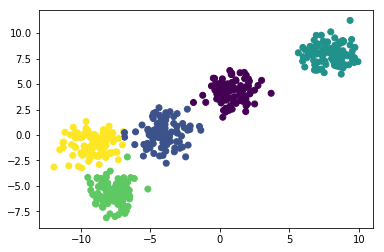

In [161]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [162]:
#K-Means


In [163]:
k=5
color=["red","blue","green","orange","yellow"]
#Randomly assign cluster centers
clusters={}
for i in range(k):
    center=20*(np.random.random((2,))-0.5)    
    clusters[i]={
        'center':center,
        'points':[],
        'color':color[i]
    }

In [164]:
print(clusters)

{0: {'center': array([ 1.61485769, -5.26512321]), 'points': [], 'color': 'red'}, 1: {'center': array([ 7.04180825, -6.76204793]), 'points': [], 'color': 'blue'}, 2: {'center': array([9.55581403, 9.56662121]), 'points': [], 'color': 'green'}, 3: {'center': array([3.29140427, 1.2016598 ]), 'points': [], 'color': 'orange'}, 4: {'center': array([-8.3660465 , -3.25829684]), 'points': [], 'color': 'yellow'}}


In [165]:
def distance(a,b):
    return np.sqrt((np.sum(a-b))**2)

In [166]:
def assignPtsToClusters(clusters,x):
    m=X.shape[0]
    #Points
    for ix in range(m):
        dist=[]
        for kx in range(k):                            
            d=distance(X[ix],clusters[kx]['center'])
            dist.append(d)
        cluster_idx=np.argmin(dist)
        clusters[cluster_idx]['points'].append(X[ix])

def updateClusterCenters(clusters):
    #Iterate over every cluster x
    for kx in range(k):
        pts=np.array(clusters[kx]['points'])
        
        if pts.shape[0]>0:
            new_coordinates=np.mean(pts,axis=0)
            clusters[kx]['center']=new_coordinates
            clusters[kx]['points']=[]
            
        

In [167]:
def plotClusters(clusters,k):
    #plt.scatter(X[:,0],X[:,1])
    for i in range(k):
        pts=np.array(clusters[i]['points'])
        if pts.shape[0]>0:
            
            plt.scatter(pts[:,0],pts[:,1],color=clusters[i]['color'])
            plt.scatter(clusters[i]['center'][0],clusters[i]['center'][1],marker='*')
    plt.show()

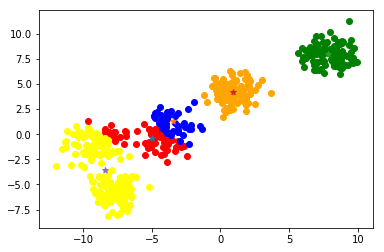

In [172]:
assignPtsToClusters(clusters,X)
plotClusters(clusters,5)
updateClusterCenters(clusters)


In [ ]:
##

In [180]:
np.mat([[1,2,3],[36,4,5]],dtype='int32')

matrix([[ 1,  2,  3],
        [36,  4,  5]])

# Sklearn K -Means

In [194]:
from sklearn.cluster import KMeans

In [195]:
kmeans=KMeans(n_clusters=5)

In [196]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [197]:
kmeans.cluster_centers_

array([[ 0.88641907,  4.19441853],
       [-9.0671623 , -0.96740759],
       [ 7.8649674 ,  7.97988109],
       [-3.97953526,  0.19458336],
       [-7.6726196 , -5.69211059]])

In [202]:
centers=kmeans.cluster_centers_

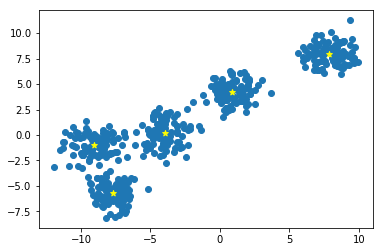

In [203]:
plt.scatter(X[:,0],X[:,1])
plt.scatter(centers[:,0],centers[:,1],marker="*",color="yellow")
plt.show()

In [199]:
plotClusters2(kmeans.cluster_centers_,5)